In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x_train = np.array(np.load("x_train.npy"))
x_test = np.array(np.load("x_test.npy"))
x_val = np.array(np.load("x_val.npy"))
y_train = np.array(np.load("y_train.npy"))
y_test = np.array(np.load("y_test.npy"))
y_val = np.array(np.load("y_val.npy"))

x_train = x_train.reshape(-1, 96, 128, 1)
x_test = x_test.reshape(-1, 96, 128, 1)
x_val = x_val.reshape(-1, 96, 128, 1)

In [2]:
model = tf.keras.Sequential()

In [3]:
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = "same",
                                 activation = "gelu",
                                 input_shape = (96,128,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [4]:
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = "same",
                                 activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [5]:
model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = "same",
                                 activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [6]:
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = "same",
                                 activation = "gelu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [7]:
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = "same",
                                 activation = "relu"))
model.add(tf.keras.layers.Flatten())

In [8]:
model.add(tf.keras.layers.Dense(64,
                                 activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [9]:
model.add(tf.keras.layers.Dense(64,
                                activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [10]:
model.add(tf.keras.layers.Dense(10,
                                activation="softmax"))

In [11]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [12]:
results = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(x_val,y_val))

Epoch 1/50
55/55 [==============================] - 18s 147ms/step - loss: 2.1956 - accuracy: 0.1666 - val_loss: 2.0062 - val_accuracy: 0.2883
Epoch 2/50
55/55 [==============================] - 6s 111ms/step - loss: 2.0160 - accuracy: 0.2511 - val_loss: 1.8575 - val_accuracy: 0.3616
Epoch 3/50
55/55 [==============================] - 7s 118ms/step - loss: 1.8331 - accuracy: 0.3191 - val_loss: 1.5057 - val_accuracy: 0.4565
Epoch 4/50
55/55 [==============================] - 6s 114ms/step - loss: 1.6252 - accuracy: 0.3927 - val_loss: 1.2478 - val_accuracy: 0.5572
Epoch 5/50
55/55 [==============================] - 6s 113ms/step - loss: 1.4255 - accuracy: 0.4723 - val_loss: 1.1274 - val_accuracy: 0.6087
Epoch 6/50
55/55 [==============================] - 6s 114ms/step - loss: 1.3112 - accuracy: 0.5165 - val_loss: 0.9613 - val_accuracy: 0.6602
Epoch 7/50
55/55 [==============================] - 6s 116ms/step - loss: 1.1624 - accuracy: 0.5755 - val_loss: 0.8521 - val_accuracy: 0.7517
Epoch

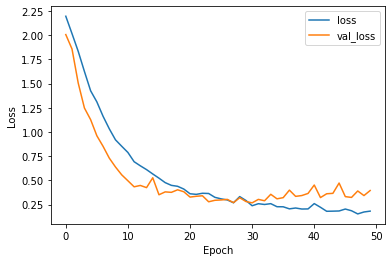

In [13]:
plt.plot(results.history["loss"], label="loss")

plt.plot(results.history["val_loss"], label="val_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.show()

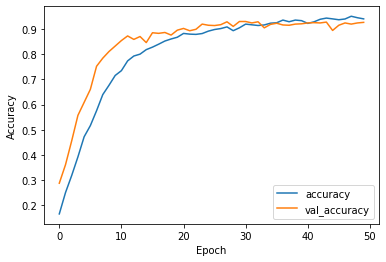

In [14]:
plt.plot(results.history["accuracy"], label="accuracy")

plt.plot(results.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()

plt.show()

In [15]:
model.evaluate(x_test, y_test)

28/28 [==============================] - 1s 21ms/step - loss: 0.5712 - accuracy: 0.9129


[0.5711514949798584, 0.9129438996315002]